# Import Libraries

In [37]:
# Opening and Copying Files/Directories
import os
import shutil

# Plotting
import matplotlib.pyplot as plt

# Used to find width and height of image
from PIL import Image

# Machine Learning/Deep Learning
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Read in Data

In [2]:
# Path of Animals-10 image dataset from Kaggle which I downloaded from the website
data_path = '/Users/brandoncohen/Projects/raw-img'

# List of the classes 
classes_list = sorted(os.listdir(data_path))[1:]
print(classes_list)
#/Users/brandoncohen/Projects/raw-img

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [3]:
# Dictionary is created because the class names are in a different language
translations_dict = {
    'cane': 'dog',
    'cavallo': 'horse',
    'elefante': 'elephant',
    'farfalla': 'butterfly',
    'gallina': 'chicken',
    'gatto': 'cat',
    'mucca': 'cow',
    'pecora': 'sheep',
    'ragno': 'spider',
    'scoiattolo': 'squirrel'
}

# Find Distribution of Each Class

In [4]:
class_size = []
class_names = []

# Iterate through each class
for class_name in classes_list:
    # Return the path of the folder that contains all the images for the respective class
    class_dir = os.path.join(data_path, class_name)

    # If the path is a folder,
    if os.path.isdir(class_dir):
        # Count the number of files (images) in the class directory
        num_images = len(os.listdir(class_dir))

        # Ad the images and names to the lists
        class_size.append(num_images)
        class_names.append(translations_dict[class_name]
                          )
        print(f"{translations_dict[class_name]}, {num_images}")

dog, 4863
horse, 2623
elephant, 1446
butterfly, 2112
chicken, 3098
cat, 1668
cow, 1866
sheep, 1820
spider, 4821
squirrel, 1862


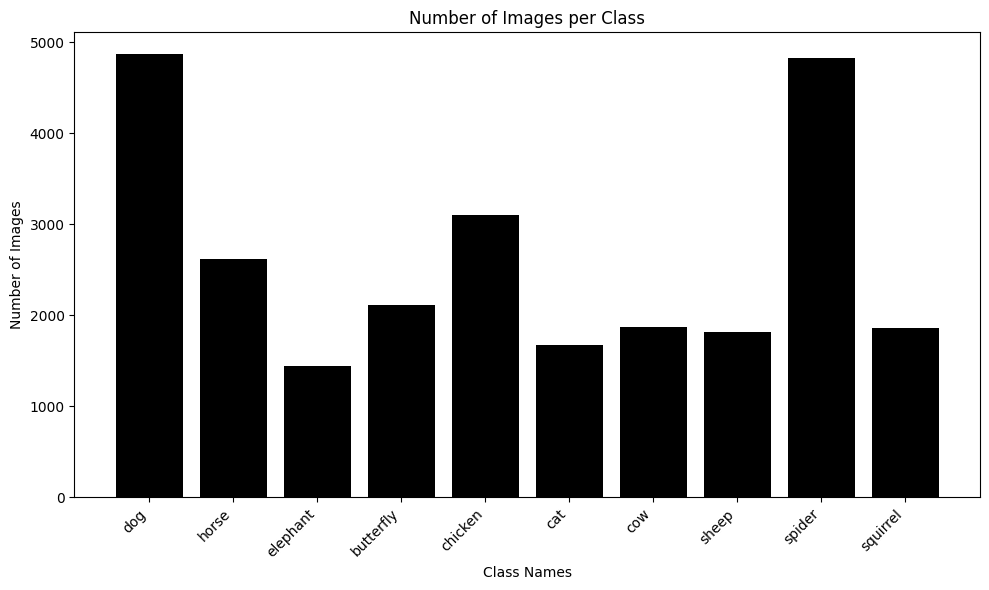

In [5]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_size, color='black')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the above histogram, we can tell that if we train based on the dataset right now, then we can get high bias. To make the data more distributed, I am going to use the first 2000 images from each class.

# Make New Directory with Labeled Images

In [6]:
# Path to the new labeled dataset
labeled_data_path = '/Users/brandoncohen/Projects/labeled_imgs'

# Create the new directory if it doesn't exist
os.makedirs(labeled_data_path, exist_ok=True)

# Number of images that will be selected for each class
num_images_per_class = 2000

index_original_name = 0

# Iterate through each class
for class_name in class_names:
    # Create a subdirectory for the class in the labeled dataset
    class_dir = os.path.join(labeled_data_path, class_name)      #/Users/brandoncohen/Projects/labeled_imgs/dogs
    os.makedirs(class_dir, exist_ok=True)
    
    # Path to the original class directory
    original_class_dir = os.path.join(data_path, classes_list[index_original_name])
    
    # Make a list of all of the image names in the the original class directory
    images_list = os.listdir(original_class_dir)
    
    # Select the first 2000 image names
    selected_images = images_list[:num_images_per_class]
    
    # Move the selected images to the new labeled dataset directory
    for image_name in selected_images:
        # Path of the image in the original directory
        original_image_path = os.path.join(original_class_dir, image_name)
        print(original_image_path)
        # Path of the image in the new directory
        new_image_path = os.path.join(class_dir, f'{class_name}_{image_name}')
        print(new_image_path)
        # Copy the image to the new folder
        shutil.copy(original_image_path, new_image_path)

    # Update index in the list of names with the original names
    index_original_name = index_original_name + 1


/Users/brandoncohen/Projects/raw-img/cane/OIP-7Kyjub53-QqanyWanuJpOwHaHx.jpeg
/Users/brandoncohen/Projects/labeled_imgs/dog/dog_OIP-7Kyjub53-QqanyWanuJpOwHaHx.jpeg
/Users/brandoncohen/Projects/raw-img/cane/OIP-L3TRIOoPlmb3isOmx9DYDwHaEK.jpeg
/Users/brandoncohen/Projects/labeled_imgs/dog/dog_OIP-L3TRIOoPlmb3isOmx9DYDwHaEK.jpeg
/Users/brandoncohen/Projects/raw-img/cane/OIP-bTKnRAJfpOhQhD4AC4ZjZAAAAA.jpeg
/Users/brandoncohen/Projects/labeled_imgs/dog/dog_OIP-bTKnRAJfpOhQhD4AC4ZjZAAAAA.jpeg
/Users/brandoncohen/Projects/raw-img/cane/OIP-nj_6eSbDiI1jXD7cPD4i7wHaFr.jpeg
/Users/brandoncohen/Projects/labeled_imgs/dog/dog_OIP-nj_6eSbDiI1jXD7cPD4i7wHaFr.jpeg
/Users/brandoncohen/Projects/raw-img/cane/OIP-sH7u4NwO_gj427Z0cw3C5gHaEX.jpeg
/Users/brandoncohen/Projects/labeled_imgs/dog/dog_OIP-sH7u4NwO_gj427Z0cw3C5gHaEX.jpeg
/Users/brandoncohen/Projects/raw-img/cane/OIP-KpXLr2QOZBB2ob4jLqQ_5AHaE8.jpeg
/Users/brandoncohen/Projects/labeled_imgs/dog/dog_OIP-KpXLr2QOZBB2ob4jLqQ_5AHaE8.jpeg
/Users/brandonco

# Make New Directory with Training, Test, and Validation Directory

In [34]:
# Delete the train, test, and validation directories if they exist
for folder in ['train', 'test', 'val']:
    folder_path = os.path.join(labeled_data_path, folder)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)

In [35]:
#Create directories for train, test, and validation sets
train_path = os.path.join(labeled_data_path, 'train')
test_path = os.path.join(labeled_data_path, 'test')
val_path = os.path.join(labeled_data_path, 'val')
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Iterate through each class
for class_name in class_names:
    # Path to the class directory
    class_dir = os.path.join(labeled_data_path, class_name)      #/Users/brandoncohen/Projects/labeled_imgs/dog
    os.makedirs(class_dir, exist_ok=True)
    
    
    # List of all image names in the class directory
    images_names_list = os.listdir(class_dir)
    
    # Split the images into train, test, and validation sets
    train_images, test_images = train_test_split(images_names_list, test_size=0.1, random_state=2442)
    train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=2442)
    
    # Create class dir in training dir and move images to training directory 
    os.makedirs(train_path + '/' + class_name, exist_ok=True)
    for image in train_images:
        # Path of the source of the training image
        src_train = os.path.join(class_dir, image)
        # Destination path of the training image
        dst_train = os.path.join(train_path + '/' + class_name, image)
        # Copy the training image from the source to the training directory
        shutil.copy(src_train, dst_train)

    # Steps are repeated for copying images for the test and validaiton set

    os.makedirs(test_path + '/' + class_name, exist_ok=True)
    for image in test_images:
        src_test = os.path.join(class_dir, image)
        dst_test = os.path.join(test_path + '/' + class_name, image)
        shutil.copy(src_test, dst_test)

    os.makedirs(val_path + '/' + class_name, exist_ok=True)
    for image in val_images:
        src_val = os.path.join(class_dir, image)
        dst_val = os.path.join(val_path + '/' + class_name, image)
        shutil.copy(src_val, dst_val)

# Find Out Size of Size of Image and Look at a Few of Them

In [8]:
labeled_data_path + '/train' 

'/Users/brandoncohen/Projects/labeled_imgs/train'

In [9]:
os.listdir(labeled_data_path + '/train' )[0]

'elephant_OIP-AImVLwcUOAHvtDwN7xAaWAHaG5.jpeg'

In [10]:
train_path +  ' / ' + os.listdir(class_dir)[0]

'/Users/brandoncohen/Projects/labeled_imgs/train / squirrel_OIP-AdRX5EjqwRFkncpNeyzpIgHaHS.jpeg'

In [27]:
class_name

'squirrel'

In [11]:
# Will store the image widths and heights
imgs_width = []
imgs_height = []

train_lists = os.listdir(labeled_data_path + '/train') 

for idx in range( len(os.listdir(labeled_data_path + '/train' )) ):
    # Open the image
    image = Image.open(labeled_data_path + '/train/' + train_lists[idx])

    # Get the size of the image
    width, height = image.size

    imgs_width.append(width)
    imgs_height.append(height)

    idx = idx + 1

print("Width:", width)
print("Height:", height)

Width: 300
Height: 225


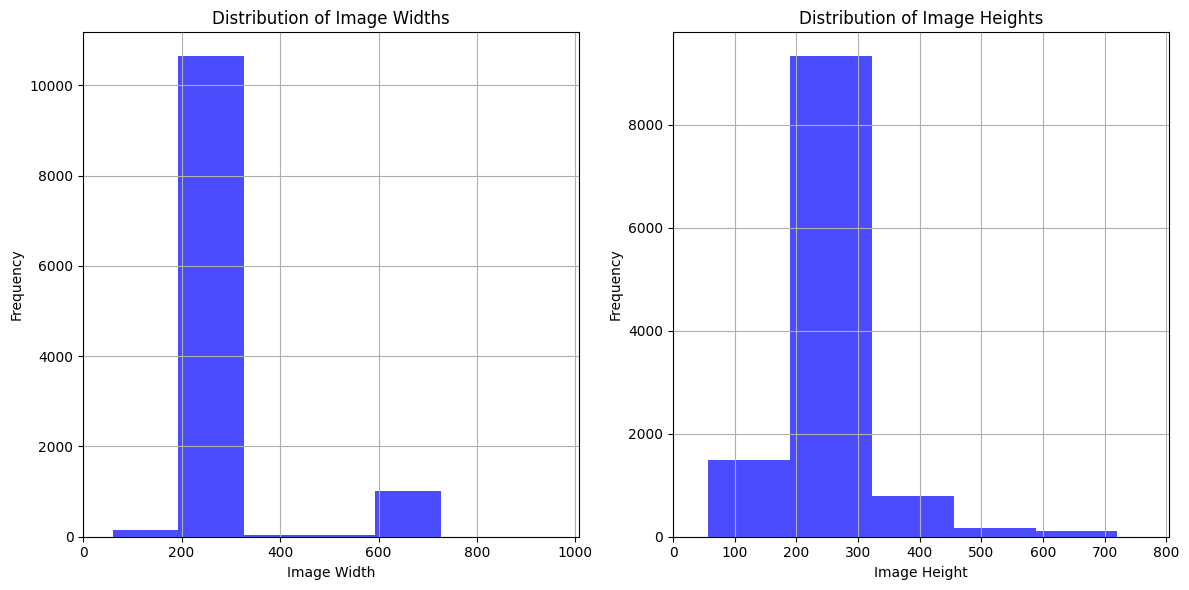

In [12]:
# Create a figure and axis object with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for image widths
axs[0].hist(imgs_width, bins=50, color='blue', alpha=0.7)
axs[0].set_xlim(0, max(imgs_width) * 0.15)  # Adjust the maximum x-value to zoom in
axs[0].set_xlabel('Image Width')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Image Widths')
axs[0].grid(True)

# Plot histogram for image heights
axs[1].hist(imgs_height, bins=40, color='blue', alpha=0.7)
axs[1].set_xlim(0, max(imgs_height) * 0.15)  # Adjust the maximum x-value to zoom in
axs[1].set_xlabel('Image Height')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Image Heights')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Due to the distribution, I am going to resize all images to be 256x256

# Data Preprocessing

In [16]:
val_path

'/Users/brandoncohen/Projects/labeled_imgs/val'

In [77]:
# Define preprocessing options
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to range [0, 1]
)

# Flow images from directories
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(256, 256),  # Resize images to 256x256
    batch_size=16,
    class_mode='categorical',  # Use 'categorical' if you have multiple classes
)

validation_generator = datagen.flow_from_directory(
    val_path,
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical',
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical',
)

Found 13433 images belonging to 10 classes.
Found 3361 images belonging to 10 classes.
Found 1868 images belonging to 10 classes.


In [78]:
# Get dictionary of index : class name
class_indices = train_generator.class_indices

# Print the class indices
print(class_indices)

{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}


In [83]:
test_generator.image_shape

(256, 256, 3)

Shape of image: (256, 256, 3)
Shape of image: (256, 256, 3)
Shape of image: (256, 256, 3)
Shape of image: (256, 256, 3)
Shape of image: (256, 256, 3)
Shape of image: (256, 256, 3)
Shape of image: (256, 256, 3)
Shape of image: (256, 256, 3)


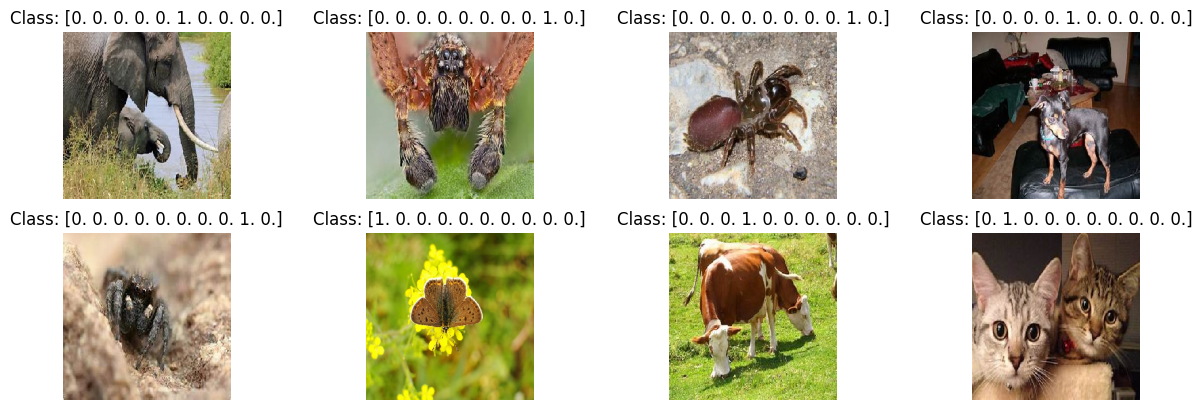

In [79]:
# Define the number of images to display
num_images = 8

# Get a batch of images and labels from the train generator
images, labels = next(train_generator)

# Display the images and labels
plt.figure(figsize=(15, 10))
for i in range(num_images):
    # Print the shape of the image
    print("Shape of image:", images[i].shape)
    
    # Plot the image
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[i]}')
    plt.axis('off')

plt.show()


# Load in InceptionV3 and Evaluate it on the Test Data

In [80]:
# Load the InceptionV3 model pre-trained on ImageNet
inception_model = InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(256, 256,3))

# Freeze all layers in the model
for layer in model.layers:
    layer.trainable = False

In [84]:
# Add layers to adapt the output for classification
x = GlobalAveragePooling2D()(inception_model.output)
predictions = Dense(10, activation='softmax')(x)

# Create a new model with the adapted output
no_change_model = Model(inputs=inception_model.input, outputs=predictions)

# Compile the model
no_change_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Evaluate the model on the test data
no_change_model.evaluate(test_generator)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 54s 449ms/step - accuracy: 0.0724 - loss: 2.5311


[2.5257811546325684, 0.07334046810865402]

Now that we know it is a horible mode without traiing, I will add two more neural networks and train the model.

### Add two new neural networks

In [98]:
# Add layers to adapt the output for classification
x = GlobalAveragePooling2D()(inception_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create a new model with the adapted output
new_model1 = Model(inputs=inception_model.input, outputs=predictions)

# Set the learning rate
learning_rate = 0.0001  

# Create the optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
new_model1.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Find Best Learning Rate

In [105]:
class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
        
    def on_batch_end(self, batch, logs):
        optimizer = self.model.optimizer
        lr = tf.convert_to_tensor(optimizer.learning_rate)  # Convert learning rate to tensor
        self.rates.append(K.get_value(lr))
        self.losses.append(logs["loss"])
        new_lr = lr * self.factor
        optimizer.learning_rate.assign(new_lr)  # Assign the new learning rate back to the optimizer


In [106]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Learning Rate
expon_lr = ExponentialLearningRate(factor=1.001)

In [107]:
# Define any callbacks you want to use (expon_lr and early_stopping in your case)
callbacks = [expon_lr, early_stopping]

# Fit the model using the generators
history1 = new_model1.fit(train_generator,
                         steps_per_epoch=len(train_generator),
                         epochs=10,
                         validation_data=validation_generator,
                         validation_steps=len(validation_generator),
                         callbacks=callbacks)

Epoch 1/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 1866s 2s/step - accuracy: 0.8482 - loss: 0.5124 - val_accuracy: 0.8164 - val_loss: 0.5815
Epoch 2/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10


2024-03-09 21:48:38.211430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-03-09 21:48:38.287579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


840/840 ━━━━━━━━━━━━━━━━━━━━ 2606s 3s/step - accuracy: 0.8846 - loss: 0.3789 - val_accuracy: 0.6263 - val_loss: 1.4028
Epoch 4/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10


2024-03-09 22:32:04.472989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-09 22:32:04.482661: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


840/840 ━━━━━━━━━━━━━━━━━━━━ 4998s 6s/step - accuracy: 0.8105 - loss: 0.6130 - val_accuracy: 0.4505 - val_loss: 2.2099
Epoch 6/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10


2024-03-09 23:55:22.094669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-09 23:55:22.104656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


840/840 ━━━━━━━━━━━━━━━━━━━━ 1678s 2s/step - accuracy: 0.7376 - loss: 0.8547 - val_accuracy: 0.4725 - val_loss: 1.7286
Epoch 7: early stopping


# Final Training

In [ ]:
# Add layers to adapt the output for classification
x = GlobalAveragePooling2D()(inception_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create a new model with the adapted output
new_model2 = Model(inputs=inception_model.input, outputs=predictions)

# Set the learning rate
learning_rate = 1e-4

# Create the optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
new_model2.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [112]:
# Fit the model using the generators
history2 = new_model2.fit(train_generator,
                         steps_per_epoch=len(train_generator),
                         epochs=20,
                         validation_data=validation_generator,
                         validation_steps=len(validation_generator),
                         callbacks=early_stopping)

Epoch 1/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 10553s 13s/step - accuracy: 0.7115 - loss: 0.9303 - val_accuracy: 0.5302 - val_loss: 1.5712
Epoch 2/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 0s 78us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20


2024-03-10 11:59:21.257695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-03-10 11:59:21.298602: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


840/840 ━━━━━━━━━━━━━━━━━━━━ 5703s 7s/step - accuracy: 0.7792 - loss: 0.7013 - val_accuracy: 0.6162 - val_loss: 1.3121
Epoch 4/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 0s 92us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20


2024-03-10 13:34:24.701542: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-10 13:34:24.751364: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


840/840 ━━━━━━━━━━━━━━━━━━━━ 3590s 4s/step - accuracy: 0.8166 - loss: 0.5967 - val_accuracy: 0.7411 - val_loss: 0.9041
Epoch 5: early stopping


In [114]:
new_model2.evaluate(test_generator)

117/117 ━━━━━━━━━━━━━━━━━━━━ 52s 447ms/step - accuracy: 0.7328 - loss: 0.9213


[0.9199491739273071, 0.7366167306900024]